# Recomendação - Estudantes que necessitam de atenção
Com base nos registros de acesso às questões, por meio de algoritmo de Filtragem Baseada em Conhecimento, nas abordagens de restrições, identificar os estudantes que estão com baixo engajamento. 

In [ ]:
#### Ideia, buscar o baixo engajamento nas atividades? Usando informação temporal

In [5]:
import pandas as pd

kt1 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt1.txt',sep='\t', index_col=0)
kt2 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt2.txt',sep='\t', index_col=0)
kt3 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt3.txt',sep='\t', index_col=0)
kt4 = pd.read_csv(r'D:\Doutorado\USP\SCC5966 - Recomendaçao\Projeto\dataset\compacto\kt4.txt',sep='\t', index_col=0)

In [43]:
kt4.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,codigo_arquivo,usuario
0,1565651017866,pay,p130,NaN,NaN,NaN,NaN,u5.csv,u5
1,1566532547478,enter,b5298,NaN,my_note,NaN,web,u5.csv,u5
2,1566532582693,respond,q7242,NaN,my_note,a,web,u5.csv,u5
3,1566532645820,respond,q7243,NaN,my_note,a,web,u5.csv,u5
4,1566532707773,respond,q7244,NaN,my_note,a,web,u5.csv,u5


In [15]:
# Removendo automaticamente as colunas 'Unnamed'
#data = kt4.loc[:, ~kt4.columns.str.contains('^Unnamed')].copy()

In [19]:
import pandas as pd

# Convertendo o timestamp para um tipo numérico (se necessário)
data["timestamp"] = pd.to_numeric(data["timestamp"])

# Filtrar apenas ações relevantes (enter, play, pause, quit)
filtered_actions = ["enter", "play", "pause", "quit"]
df_filtered = data[data["action_type"].isin(filtered_actions)]

# Ordenar os dados por usuário, item_id e timestamp
df_filtered = df_filtered.sort_values(by=["usuario", "item_id", "timestamp"])

# Criar uma função para calcular o tempo gasto em cada item_id
def calculate_time(group):
    group = group.sort_values(by="timestamp")  # Ordenar por timestamp
    group["time_diff"] = group["timestamp"].diff()  # Diferença de tempo entre ações
    total_time = group["time_diff"].sum()  # Tempo total gasto
    return pd.DataFrame({
        "usuario": [group["usuario"].iloc[0]],
        "item_id": [group["item_id"].iloc[0]],
        "total_time_spent": [total_time]
    })

# Agrupar por usuário e item_id e aplicar a função
tempo_itens = df_filtered.groupby(["usuario", "item_id"]).apply(calculate_time).reset_index(drop=True)

# Exibir o resultado final
print(tempo_itens)


C:\Users\talit\AppData\Local\Temp\ipykernel_9552\1564663703.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tempo_itens = df_filtered.groupby(["usuario", "item_id"]).apply(calculate_time).reset_index(drop=True)


       usuario item_id  total_time_spent
0        u1000      b1               0.0
1        u1000    b100               0.0
2        u1000   b1013               0.0
3        u1000   b1019               0.0
4        u1000   b1029               0.0
...        ...     ...               ...
734263    u998    l629          284630.0
734264    u998     l64          199567.0
734265    u998    l719          478096.0
734266    u998    l784          179132.0
734267    u998    l812           81689.0

[734268 rows x 3 columns]


In [45]:
tempo_itens.to_csv('D:/Doutorado/USP/SCC5966 - Recomendaçao/Projeto/dataset/dados_treinamento/tempo_itens.txt', sep='\t', index=True)

In [47]:
tempo_itens.head()

,usuario,item_id,total_time_spent
0,u1000,b1,0.0
1,u1000,b100,0.0
2,u1000,b1013,0.0
3,u1000,b1019,0.0
4,u1000,b1029,0.0


In [7]:
import pandas as pd

tempo_itens = pd.read_csv(r'D:/Doutorado/USP/SCC5966 - Recomendaçao/Projeto/dataset/dados_treinamento/tempo_itens.txt', sep='\t',index_col=0)

In [9]:
tempo_itens.head()

,usuario,item_id,total_time_spent
0,u1000,b1,0.0
1,u1000,b100,0.0
2,u1000,b1013,0.0
3,u1000,b1019,0.0
4,u1000,b1029,0.0


In [11]:
kt4.loc[kt4.action_type == 'play_video', 'item_id']

101        l588
203        l550
213        l533
269        l552
317        l524
           ... 
4101737    l520
4101739    l520
4111223    l629
4111225    l629
4111311    l537
Name: item_id, Length: 66482, dtype: object

In [57]:
tempo_itens.loc[tempo_itens.usuario == 'u1046']

,usuario,item_id,total_time_spent
4416,u1046,b11318,0.000000e+00
4417,u1046,b11376,0.000000e+00
4418,u1046,b11588,0.000000e+00
4419,u1046,b1229,0.000000e+00
4420,u1046,b1261,2.822770e+09
...,...,...,...
4948,u1046,l903,3.189810e+05
4949,u1046,l905,1.206134e+07
4950,u1046,l906,8.946900e+04
4951,u1046,l907,1.814180e+05


In [19]:
lectures = pd.read_csv('D:/Doutorado/USP/SCC5966 - Recomendaçao/Projeto/dataset/EdNet-Contents/lectures.csv')
lectures.head()

,lecture_id,part,tags,video_length,deployed_at
0,l520,5,142,-1,-1
1,l592,6,142,-1,-1
2,l1259,1,222,359000,1570424729123
3,l1260,1,220,487000,1570424738105
4,l1261,1,221,441000,1570424743162


In [21]:
lista_lectures = lectures['lecture_id'].tolist()

In [27]:
media_tempo = lectures['video_length'].mean()
print("Média de tempo:", media_tempo)

Média de tempo: 147297.27717923603


In [23]:
# Filtrando o DataFrame com base na lista
df_filtrado = tempo_itens[tempo_itens["item_id"].isin(lista_lectures)].copy()

In [25]:
df_filtrado

,usuario,item_id,total_time_spent
1669,u1000,l105,179105.0
1670,u1000,l106,268806.0
1671,u1000,l108,106471.0
1672,u1000,l119,186101.0
1673,u1000,l120,191820.0
...,...,...,...
734263,u998,l629,284630.0
734264,u998,l64,199567.0
734265,u998,l719,478096.0
734266,u998,l784,179132.0


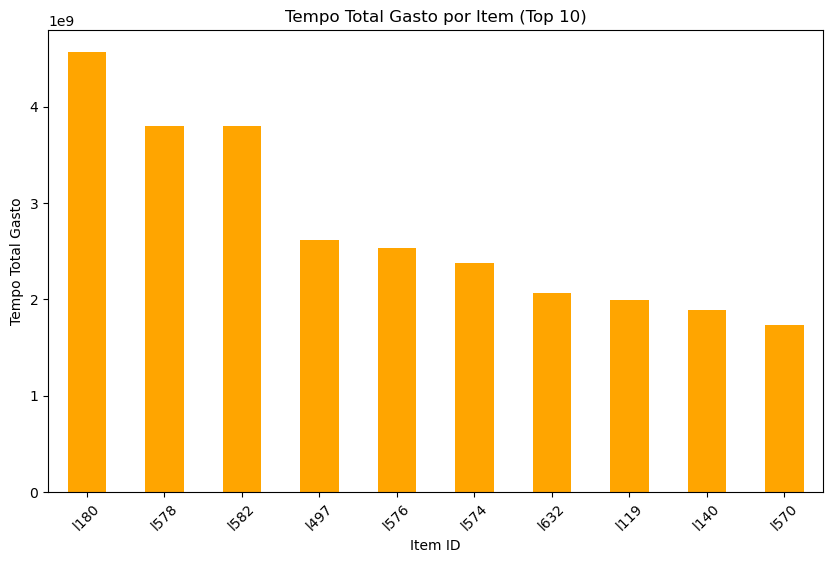

In [29]:
# Tempo gasto por item (agrupado)
df_grouped = df_filtrado.groupby('item_id')['total_time_spent'].mean().sort_values(ascending=False).head(10)  # Top 10 itens

# Gráfico de barras
df_grouped.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Tempo Total Gasto por Item (Top 10)')
plt.xlabel('Item ID')
plt.ylabel('Tempo Total Gasto')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Gerando IDs numéricos para 'usuario' e 'item_id'
df_filtrado["usuario_id"] = df_filtrado["usuario"].astype("category").cat.codes
df_filtrado["item_id_num"] = df_filtrado["item_id"].astype("category").cat.codes

In [37]:
from sklearn.cluster import KMeans

# Selecionando as colunas numéricas para clusterização
X = df_filtrado[["usuario_id", "item_id_num", "total_time_spent"]]

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df_filtrado["cluster"] = kmeans.fit_predict(X)

# Exibindo os clusters
print(df_filtrado)

       usuario item_id  total_time_spent  usuario_id  item_id_num  cluster
1669     u1000    l105          179105.0           0            7        0
1670     u1000    l106          268806.0           0            8        0
1671     u1000    l108          106471.0           0           10        0
1672     u1000    l119          186101.0           0           21        0
1673     u1000    l120          191820.0           0           23        0
...        ...     ...               ...         ...          ...      ...
734263    u998    l629          284630.0         712          541        0
734264    u998     l64          199567.0         712          551        0
734265    u998    l719          478096.0         712          619        0
734266    u998    l784          179132.0         712          690        0
734267    u998    l812           81689.0         712          722        0

[16341 rows x 6 columns]


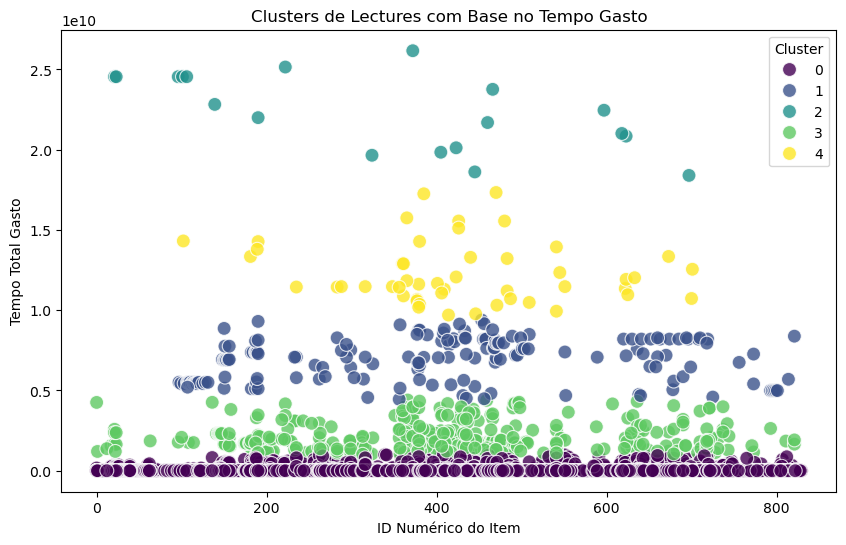

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtrado,
    x="item_id_num",
    y="total_time_spent",
    hue="cluster",
    palette="viridis",
    s=100,  # Tamanho dos pontos
    alpha=0.8  # Transparência
)
plt.title("Clusters de Lectures com Base no Tempo Gasto")
plt.xlabel("ID Numérico do Item")
plt.ylabel("Tempo Total Gasto")
plt.legend(title="Cluster")
plt.savefig('cluster_tempo_gasto.png')
plt.show()


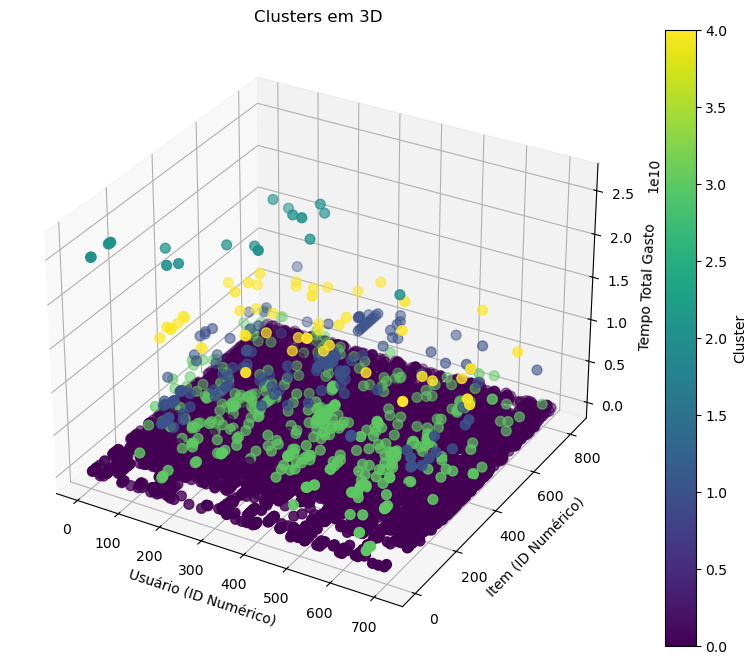

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os clusters
scatter = ax.scatter(
    df_filtrado["usuario_id"],
    df_filtrado["item_id_num"],
    df_filtrado["total_time_spent"],
    c=df_filtrado["cluster"],  # Cluster define as cores
    cmap="viridis",
    s=50
)

# Adicionando rótulos e título
ax.set_title("Clusters em 3D")
ax.set_xlabel("Usuário (ID Numérico)")
ax.set_ylabel("Item (ID Numérico)")
ax.set_zlabel("Tempo Total Gasto")

plt.colorbar(scatter, label="Cluster")
plt.show()


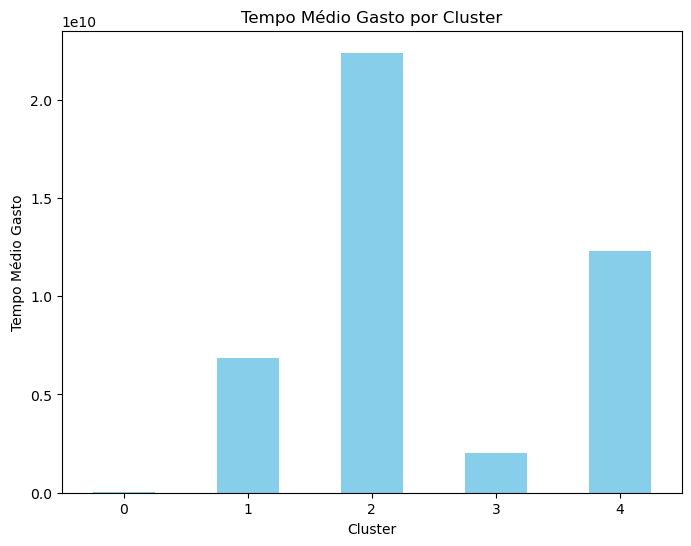

In [45]:
# Calculando a média do tempo gasto por cluster
cluster_means = df_filtrado.groupby("cluster")["total_time_spent"].mean()

# Gráfico de barras
cluster_means.plot(kind="bar", color="skyblue", figsize=(8, 6))
plt.title("Tempo Médio Gasto por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Tempo Médio Gasto")
plt.xticks(rotation=0)
plt.show()


### Buscando estudantes que gastaram baixo tempo nas *lectures*

In [59]:
estudantes = df_filtrado.loc[(df_filtrado['cluster'] == 0) & (df_filtrado['total_time_spent'] < media_tempo)]
estudantes.head()

,usuario,item_id,total_time_spent,usuario_id,item_id_num,cluster
1671,u1000,l108,106471.0,0,10,0
1675,u1000,l123,83733.0,0,26,0
1678,u1000,l129,32487.0,0,62,0
1679,u1000,l136,131797.0,0,96,0
1681,u1000,l140,95321.0,0,101,0
